In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
x = np.linspace(0.01,0.99901,1000)
y = np.log(x/(1-x))

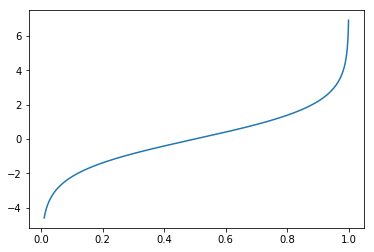

In [3]:
plt.plot(x,y)
plt.show()

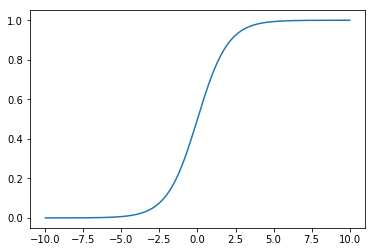

In [4]:
x = np.linspace(-10,10,10000)
y = 1 / (1 + np.exp(-x))
plt.plot(x,y)

plt.show()

In [5]:
def compute_prob(x_inp, slope, intercept):
    x = intercept + slope*(x_inp)
    p = 1 / (1 + np.exp(-x))
    return p

In [6]:
def compute_odds(p):
    return p/(1-p)

In [7]:
compute_prob(720, 0.014634, -9.346)

0.7668269008549752

In [8]:
compute_prob(721, 0.014634, -9.346)

0.7694332861002363

In [9]:
odds_720 = compute_odds(compute_prob(720, 0.014634, -9.346))
odds_720

3.28865938509501

In [10]:
odds_721 = compute_odds(compute_prob(721, 0.014634, -9.346))
odds_721

3.337139490285397

In [11]:
odds_ratio = odds_721/ odds_720

In [12]:
odds_ratio

1.0147416012160184

In [13]:
np.exp(0.014634*1)

1.0147416012160184

In [14]:
compute_odds(compute_prob(821, 0.014634, -9.346)) / compute_odds(
    compute_prob(820, 0.014634, -9.346)
)

1.014741601216019

In [15]:
compute_prob(655, 0.014634, -9.346)

0.5595337444084892

In [16]:
compute_prob(745, 0.014634, -9.346)

0.8258261009695691

In [17]:
odds_ratio_of_90_point_increase = compute_odds(
    compute_prob(745, 0.014634, -9.346)
) / compute_odds(compute_prob(655, 0.014634, -9.346))
odds_ratio_of_90_point_increase

3.7324318808871175

In [18]:
odds_ratio_of_90_point_increase = compute_odds(
    compute_prob(690, 0.014634, -9.346)
) / compute_odds(compute_prob(600, 0.014634, -9.346))
odds_ratio_of_90_point_increase

3.7324318808871175

In [19]:
np.exp(0.014634*90)

3.732431880887118

In [20]:
compute_prob(600, 0.014634, -9.346)

0.3622527205127533

In [21]:
compute_prob(700, 0.014634, -9.346)

0.7104971922190415

In [22]:
odds = []
odds_increase = []
cibil_score = [600, 610, 620, 630, 640, 650, 660, 670, 680, 690, 700]
for cibil in cibil_score:
    odds.append(compute_odds(compute_prob(cibil, 0.014634, -9.346)))
for od1 in odds:
    odds_increase.append(od1 / odds[0])

In [23]:
df = pd.DataFrame(
    {"Cibil_score": cibil_score, "Odds": odds, "Odds_Increase": odds_increase}
)

In [24]:
df['pct_increase'] = 100*(df['Odds_Increase'] - 1)
df['change'] = np.arange(0,110,10)
df

,Cibil_score,Odds,Odds_Increase,pct_increase,change
0,600,0.568019,1.000000,0.000000,0
1,610,0.657533,1.157590,15.758970,10
2,620,0.761154,1.340014,34.001392,20
3,630,0.881104,1.551186,55.118631,30
4,640,1.019957,1.795637,79.563730,40
5,650,1.180691,2.078611,107.861124,50
6,660,1.366756,2.406179,140.617897,60
7,670,1.582143,2.785368,178.536800,70
8,680,1.831472,3.224313,222.431331,80
9,690,2.120093,3.732432,273.243188,90


In [25]:
df['prob'] = compute_prob(df['Cibil_score'], 0.014634, -9.346)

In [26]:
df

,Cibil_score,Odds,Odds_Increase,pct_increase,change,prob
0,600,0.568019,1.000000,0.000000,0,0.362253
1,610,0.657533,1.157590,15.758970,10,0.396694
2,620,0.761154,1.340014,34.001392,20,0.432190
3,630,0.881104,1.551186,55.118631,30,0.468397
4,640,1.019957,1.795637,79.563730,40,0.504940
5,650,1.180691,2.078611,107.861124,50,0.541430
6,660,1.366756,2.406179,140.617897,60,0.577481
7,670,1.582143,2.785368,178.536800,70,0.612725
8,680,1.831472,3.224313,222.431331,80,0.646827
9,690,2.120093,3.732432,273.243188,90,0.679497


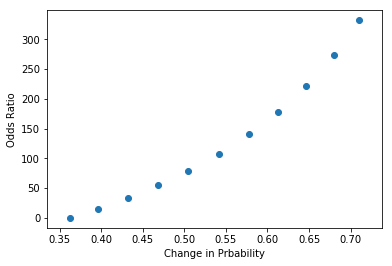

In [27]:
plt.scatter(df.prob, df.pct_increase)
plt.xlabel("Change in Prbability")
plt.ylabel("Odds Ratio")
plt.show()

**This is the percentage increase in the odds and not the percentage increase in probability**


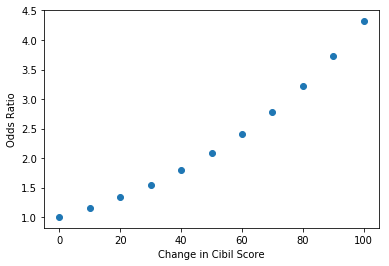

In [28]:
plt.scatter(df.change, df.Odds_Increase)
plt.xlabel("Change in Cibil Score")
plt.ylabel("Odds Ratio")
plt.show()

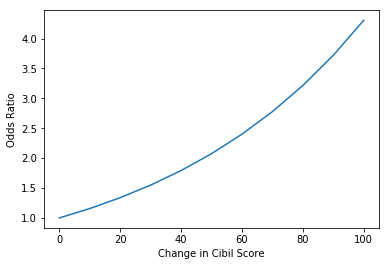

In [29]:
plt.plot(df.change, np.exp(0.0146*df.change))
plt.xlabel("Change in Cibil Score")
plt.ylabel("Odds Ratio")
plt.show()

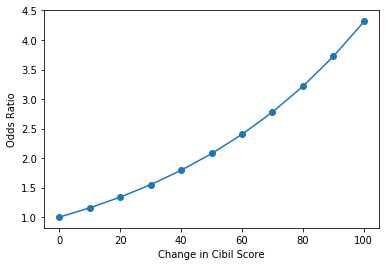

In [30]:
plt.scatter(df.change, df.Odds_Increase)
plt.plot(df.change, np.exp(0.0146*df.change))
plt.xlabel("Change in Cibil Score")
plt.ylabel("Odds Ratio")
plt.show()

If we are planning to plot odds ratio for different intervals
like 620 to 630 etc

If we graph those odds ratios with any interval of change.
then we are gonna get back a regression line that looks a lot like
the one we derived

In [31]:
p = np.arange(0,1,0.01)

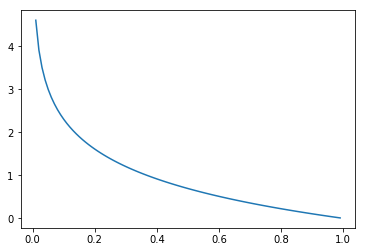

In [32]:
plt.plot(p,-1 * np.log(p))
plt.show()

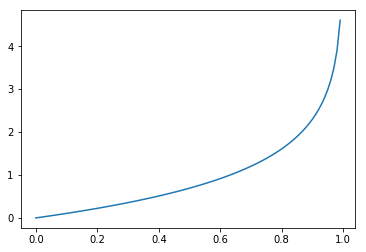

In [33]:
plt.plot(p,-1 * (np.log(1- p)))
plt.show()

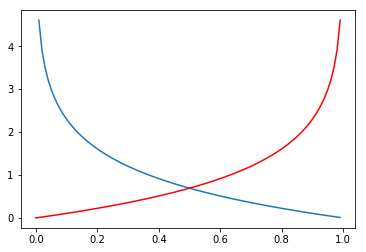

In [34]:
plt.plot(p,-1 * np.log(p))
plt.plot(p,-1 * (np.log(1- p)), 'r')
plt.show()